<a href="https://colab.research.google.com/github/bijili-parasa/projects-/blob/main/pnuemonia_cnn_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od


In [ ]:
dataset = 'https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia'

In [ ]:
od.download(dataset)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anuradhabhanu
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:19<00:00, 129MB/s] 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
img_width, img_height =224,224
num_of_class = 2
sample_train= keras.utils.image_dataset_from_directory(
    directory ='/content/chest-xray-pneumonia/chest_xray/train',
    labels ='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(img_width,img_height))

Found 5216 files belonging to 2 classes.


In [ ]:
print(sample_train,num_of_class)

In [ ]:
print(sample_train.class_names)


['NORMAL', 'PNEUMONIA']


In [ ]:
# Extracting Features and Labels
x = []
y = []

for feature, label in sample_train:
    x.append(feature.numpy())
    y.append(label.numpy())
print(y)
# Concatenate the lists to get the full 'x' and 'y' arrays
x = np.concatenate(x, axis=0)
y = np.concatenate(y, axis=0)
print("done")


Streaming output truncated to the last 5000 lines.
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32), array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32), array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
print("shape of 'x_val':", x.shape)
print("shape of 'y_val':", y.shape)


shape of 'x_val': (5216, 224, 224, 3)
shape of 'y_val': (5216, 2)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3, random_state = 2)


In [ ]:
print(x_train.shape)
print(y_train.shape)

(3651, 224, 224, 3)
(3651, 2)


In [ ]:
print(x_test.shape)

(1565, 224, 224, 3)


In [ ]:
x_train = x_train/255
x_test = x_test/255



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPool2D, Flatten, Conv2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       608       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 8)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 16)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 16)        0

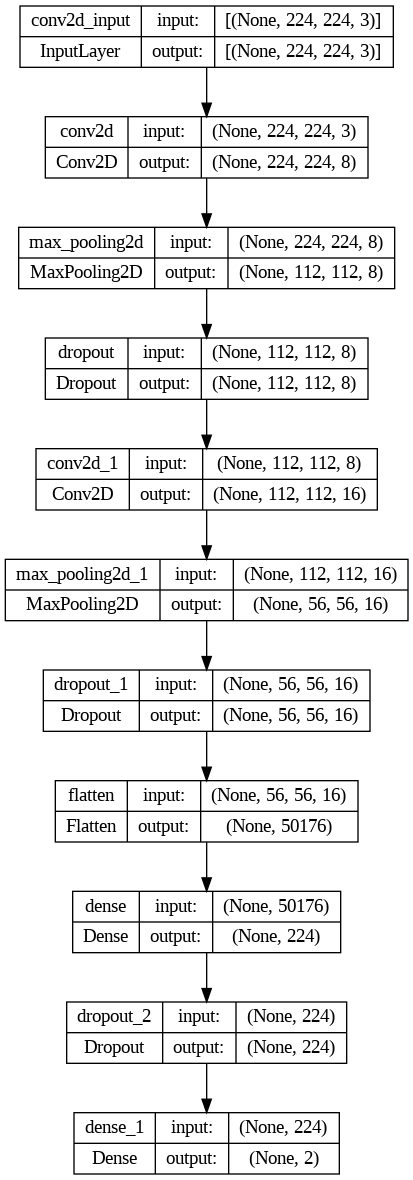

In [ ]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size =(5,5), padding ='Same', activation = 'relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size=(3,3), padding= 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2), strides= (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(224,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation ="softmax"))

optimizer = Adam(lr=0.001,beta_1 = 0.9, beta_2=0.999)
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics =["accuracy"])
model.summary()
epochs = 10
keras.utils.plot_model(model, show_shapes =True)

In [ ]:
history = model.fit(x_train,y_train, epochs = epochs)

Epoch 1/10
115/115 [==============================] - 161s 1s/step - loss: 1.1114 - accuracy: 0.7686
Epoch 2/10
115/115 [==============================] - 158s 1s/step - loss: 0.3106 - accuracy: 0.8587
Epoch 3/10
115/115 [==============================] - 156s 1s/step - loss: 0.2863 - accuracy: 0.8833
Epoch 4/10
115/115 [==============================] - 157s 1s/step - loss: 0.2132 - accuracy: 0.9074
Epoch 5/10
115/115 [==============================] - 152s 1s/step - loss: 0.1735 - accuracy: 0.9345
Epoch 6/10
115/115 [==============================] - 153s 1s/step - loss: 0.2121 - accuracy: 0.9176
Epoch 7/10
115/115 [==============================] - 155s 1s/step - loss: 0.1792 - accuracy: 0.9260
Epoch 8/10
115/115 [==============================] - 167s 1s/step - loss: 0.1510 - accuracy: 0.9406
Epoch 9/10
115/115 [==============================] - 173s 1s/step - loss: 0.1475 - accuracy: 0.9469
Epoch 10/10
115/115 [==============================] - 162s 1s/step - loss: 0.1303 - accura